In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import pandas as pd
from model_1 import *

palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='whitegrid', font="cmr10", font_scale=1.0)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [2]:
monkey = 'V'
session = 0
seed_network = session + 10 if monkey=='V' else session
bid = 3
trials = 80
env = Environment(monkey=monkey, session=session)
net = build_network(env, seed_network=seed_network)
sim = nengo.Simulator(net, dt=net.env.dt, progress_bar=False)    
with sim:
    for trial in env.empirical.query("monkey==@monkey & session==@session & bid==@bid")['trial'].unique()[:trials]:
        print(f"running monkey {env.monkey}, session {session}, block {bid}, trial {trial}")
        net.env.set_cue(bid, trial)
        sim.run(net.env.t_cue)
        env.set_action(sim, net)
        env.set_reward(bid, trial)
        sim.run(net.env.t_reward)

running monkey V, session 0, block 3, trial 1
running monkey V, session 0, block 3, trial 2
running monkey V, session 0, block 3, trial 3
running monkey V, session 0, block 3, trial 4
running monkey V, session 0, block 3, trial 5
running monkey V, session 0, block 3, trial 6
running monkey V, session 0, block 3, trial 7
running monkey V, session 0, block 3, trial 8
running monkey V, session 0, block 3, trial 9
running monkey V, session 0, block 3, trial 10
running monkey V, session 0, block 3, trial 11
running monkey V, session 0, block 3, trial 12
running monkey V, session 0, block 3, trial 13
running monkey V, session 0, block 3, trial 14
running monkey V, session 0, block 3, trial 15
running monkey V, session 0, block 3, trial 16
running monkey V, session 0, block 3, trial 17
running monkey V, session 0, block 3, trial 18
running monkey V, session 0, block 3, trial 19
running monkey V, session 0, block 3, trial 20
running monkey V, session 0, block 3, trial 21
running monkey V, sess

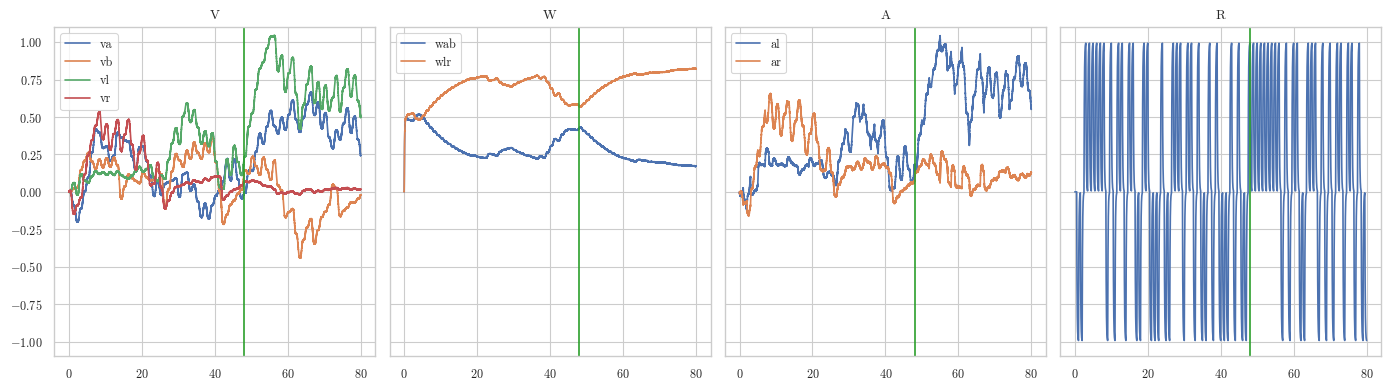

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(14, 4))
axes[0].plot(sim.trange(), sim.data[net.p_v][:,0], label='va')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,1], label='vb')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,2], label='vl')
axes[0].plot(sim.trange(), sim.data[net.p_v][:,3], label='vr')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,0], label='vletl')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,1], label='vletr')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,2], label='let')
# axes[0].plot(sim.trange(), sim.data[net.p_vlet][:,3], label='1-let')
# axes[0].plot(sim.trange(), sim.data[net.p_vletout][:,0], label='vletoutl', alpha=0.5)
# axes[0].plot(sim.trange(), sim.data[net.p_vletout][:,1], label='vletoutr', alpha=0.5)
axes[1].plot(sim.trange(), sim.data[net.p_w][:,0], label='wab')
axes[1].plot(sim.trange(), sim.data[net.p_w][:,1], label='wlr')
# axes[2].plot(sim.trange(), sim.data[net.p_evc][:,0], label='dva')
# axes[2].plot(sim.trange(), sim.data[net.p_evc][:,1], label='dvb')
# axes[2].plot(sim.trange(), sim.data[net.p_evc][:,2], label='dvl')
# axes[2].plot(sim.trange(), sim.data[net.p_evc][:,3], label='dvr')
# axes[2].plot(sim.trange(), sim.data[net.p_evu][:,0], label='dva')
# axes[2].plot(sim.trange(), sim.data[net.p_evu][:,1], label='dvb')
# axes[2].plot(sim.trange(), sim.data[net.p_evu][:,2], label='dvl')
# axes[2].plot(sim.trange(), sim.data[net.p_evu][:,3], label='dvr')
# axes[3].plot(sim.trange(), sim.data[net.p_ew][:,0], label='dwab')
# axes[3].plot(sim.trange(), sim.data[net.p_ew][:,1], label='dwlr')
axes[2].plot(sim.trange(), sim.data[net.p_a][:,0], label='al')
axes[2].plot(sim.trange(), sim.data[net.p_a][:,1], label='ar')
axes[3].plot(sim.trange(), sim.data[net.p_reward][:,0])
axes[0].set(title='V', ylim=(-1.1,1.1))
axes[1].set(title='W')
# axes[2].set(title='Ev')
# axes[3].set(title='Ew')
axes[2].set(title='A')
axes[3].set(title='R')
axes[0].legend()
axes[1].legend()
axes[2].legend()
# axes[3].legend()
# axes[4].legend()
if trials>40:
    reversal_at_trial = env.empirical.query("monkey==@monkey & session==@session & bid==@bid")['reversal_at_trial'].unique()[0]
    axes[0].axvline(reversal_at_trial, color=palette[2])
    axes[1].axvline(reversal_at_trial, color=palette[2])
    axes[2].axvline(reversal_at_trial, color=palette[2])
    axes[3].axvline(reversal_at_trial, color=palette[2])
    # axes[4].axvline(reversal_at_trial, color=palette[2])
    # axes[5].axvline(reversal_at_trial, color=palette[2])
plt.tight_layout()

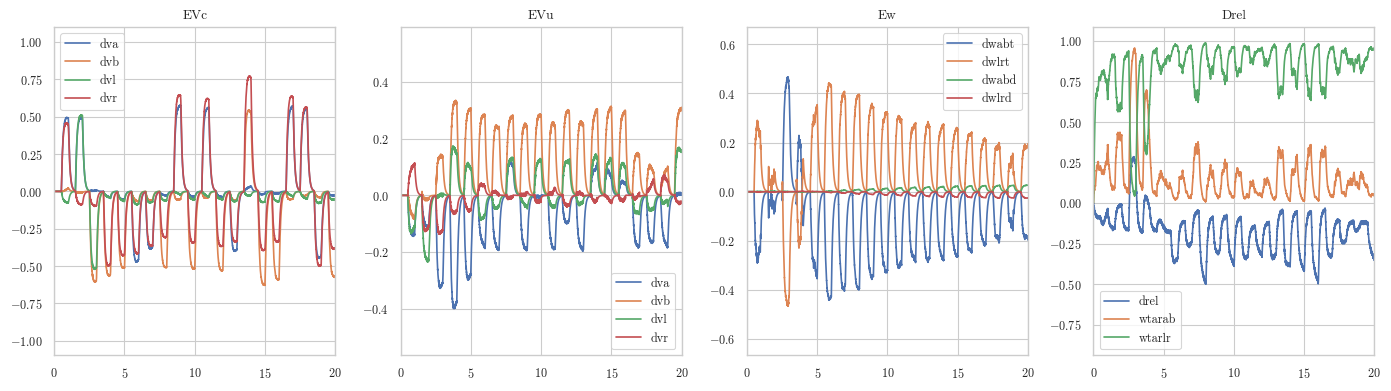

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=False, sharex=True, figsize=(14, 4))
axes[0].plot(sim.trange(), sim.data[net.p_evcout][:,0], label='dva')
axes[0].plot(sim.trange(), sim.data[net.p_evcout][:,1], label='dvb')
axes[0].plot(sim.trange(), sim.data[net.p_evcout][:,2], label='dvl')
axes[0].plot(sim.trange(), sim.data[net.p_evcout][:,3], label='dvr')
axes[1].plot(sim.trange(), sim.data[net.p_evuout][:,0], label='dva')
axes[1].plot(sim.trange(), sim.data[net.p_evuout][:,1], label='dvb')
axes[1].plot(sim.trange(), sim.data[net.p_evuout][:,2], label='dvl')
axes[1].plot(sim.trange(), sim.data[net.p_evuout][:,3], label='dvr')
axes[2].plot(sim.trange(), sim.data[net.p_ewt][:,0], label='dwabt')
axes[2].plot(sim.trange(), sim.data[net.p_ewt][:,1], label='dwlrt')
axes[2].plot(sim.trange(), sim.data[net.p_ewd][:,0]*env.gamma_omega, label='dwabd')
axes[2].plot(sim.trange(), sim.data[net.p_ewd][:,1]*env.gamma_omega, label='dwlrd')
axes[3].plot(sim.trange(), sim.data[net.p_drelout][:,0], label='drel')
axes[3].plot(sim.trange(), sim.data[net.p_wtarout][:,0], label='wtarab')
axes[3].plot(sim.trange(), sim.data[net.p_wtarout][:,1], label='wtarlr')
axes[0].set(title='EVc', ylim=(-1.1,1.1))
axes[1].set(title='EVu')
axes[2].set(title='Ew')
axes[3].set(title='Drel')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[3].legend()
axes[3].set(xlim=(0, 20))
if trials>40:
    reversal_at_trial = env.empirical.query("monkey==@monkey & session==@session & bid==@bid")['reversal_at_trial'].unique()[0]
    axes[0].axvline(reversal_at_trial, color=palette[2])
    axes[1].axvline(reversal_at_trial, color=palette[2])
    axes[2].axvline(reversal_at_trial, color=palette[2])
    axes[3].axvline(reversal_at_trial, color=palette[2])
plt.tight_layout()

# Compare

In [10]:
dfs = []
for monkey in ['V', 'W']:
    for session in [0,1,2,3]:
        data = pd.read_pickle(f"data/model1_nonodes/model1_monkey{monkey}_session{session}_behavior.pkl")
        dfs.append(data)
simulated = pd.concat(dfs, ignore_index=True)
simulated.to_pickle("data/model1_accuracy.pkl")

In [11]:
monkey_accuracy = pd.read_pickle("data/monkey_accuracy.pkl")
model_accuracy = pd.read_pickle("data/model1_accuracy.pkl")

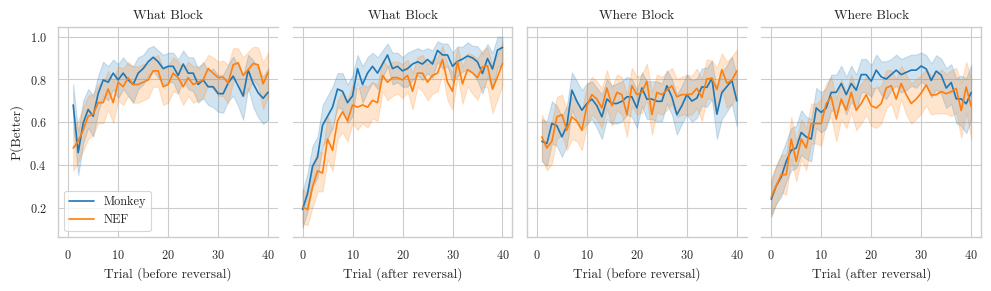

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=4, sharey=True, sharex=True, figsize=(10, 3))
sns.lineplot(monkey_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[0], label='Monkey')
sns.lineplot(monkey_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[1])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[0], ax=axes[2])
sns.lineplot(monkey_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[0], ax=axes[3])
sns.lineplot(model_accuracy.query("bid<13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[0], label='NEF')
sns.lineplot(model_accuracy.query("bid<13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[1])
sns.lineplot(model_accuracy.query("bid>=13 & trial_before_reversal<=40"), x='trial_before_reversal', y='accuracy', color=palette[1], ax=axes[2])
sns.lineplot(model_accuracy.query("bid>=13 & trial_after_reversal<=40"), x='trial_after_reversal', y='accuracy', color=palette[1], ax=axes[3])
axes[0].legend()
axes[0].set(ylabel="P(Better)", xlabel='Trial (before reversal)', title='What Block')
axes[1].set(xlabel='Trial (after reversal)', title='What Block')
axes[2].set(xlabel='Trial (before reversal)', title='Where Block')
axes[3].set(xlabel='Trial (after reversal)', title='Where Block')
axes[0].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[3].spines['left'].set_visible(False)
fig.tight_layout()
fig.savefig("plots/model1_behavior.jpg", dpi=600)

# Output to Jae's format

In [9]:
model_values = pd.read_pickle("data/model1_monkeyV_session1_values.pkl")

In [10]:
model_values

,monkey,session,block,trial,va,vb,vl,vr,wab,wlr,al,ar,accuracy
0,V,1,1,1,0.031025,0.048336,0.101492,-0.019874,0.476837,0.520523,-0.046531,-0.260924,1
1,V,1,1,2,0.066749,-0.058945,0.034194,-0.000545,0.442896,0.553740,-0.146716,-0.202319,1
2,V,1,1,3,0.158881,-0.067923,-0.000813,0.115870,0.442640,0.554571,-0.131189,-0.086305,0
3,V,1,1,4,0.072616,-0.020188,-0.040675,0.101388,0.472063,0.525679,-0.043309,-0.214630,0
4,V,1,1,5,0.113288,0.024403,0.087698,0.048191,0.503668,0.496681,0.050516,-0.213259,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,V,1,2,76,-0.007472,0.411267,0.456673,-0.242572,0.331037,0.671924,0.293006,-0.210010,0
156,V,1,2,77,0.066218,0.367155,0.461806,-0.240850,0.315581,0.689901,0.322514,-0.197510,0
157,V,1,2,78,-0.008172,0.326005,0.357900,-0.239817,0.303614,0.702450,0.202873,-0.234034,0
158,V,1,2,79,-0.137946,0.295533,0.230454,-0.227702,0.293409,0.712813,-0.006714,-0.310100,0


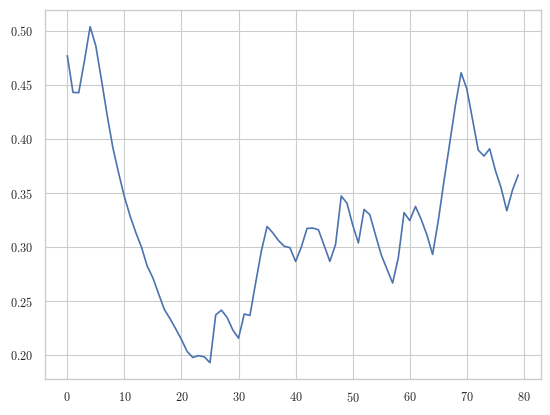

In [14]:
plt.plot(model_values.query("block==1")['wab'].to_numpy())

In [9]:
np.load("data/spikes/monkeyV_session1_block2_values.npz")['va'].shape

(80,)

In [10]:
np.load("data/spikes/monkeyV_session1_block2_spikes.npz")['v'].shape

(50, 3000, 80)